In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configure notebook settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

# --- Load Data ---
# Define the paths to the raw data files based on your project structure image
DATA_PATH = os.path.join('..', 'data', 'raw', 'data.csv')
DEFINITIONS_PATH = os.path.join('..', 'data', 'raw', 'Xente_Variable_Definitions.csv')

try:
    df = pd.read_csv(DATA_PATH)
    df_def = pd.read_csv(DEFINITIONS_PATH)
    print("Data and Definitions loaded successfully.")
except FileNotFoundError:
    print(f"Error: One or both files not found. Expected: {DATA_PATH} and {DEFINITIONS_PATH}")
    # Handle error or ensure files are correctly placed
    
# --- 1. Overview of the Data (Instructions 1) ---
print("\n--- Data Structure Overview ---")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

print("\nFirst 5 rows of the Transaction Data:")
print(df.head())

print("\nVariable Definitions:")
print(df_def)

print("\nColumn data types and non-null counts:")
df.info()

Data and Definitions loaded successfully.

--- Data Structure Overview ---
Number of rows: 95662
Number of columns: 16

First 5 rows of the Transaction Data:
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  Pro


--- Summary Statistics for Numerical Features ---
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000

--- Numerical Feature Distributions (Histograms) ---


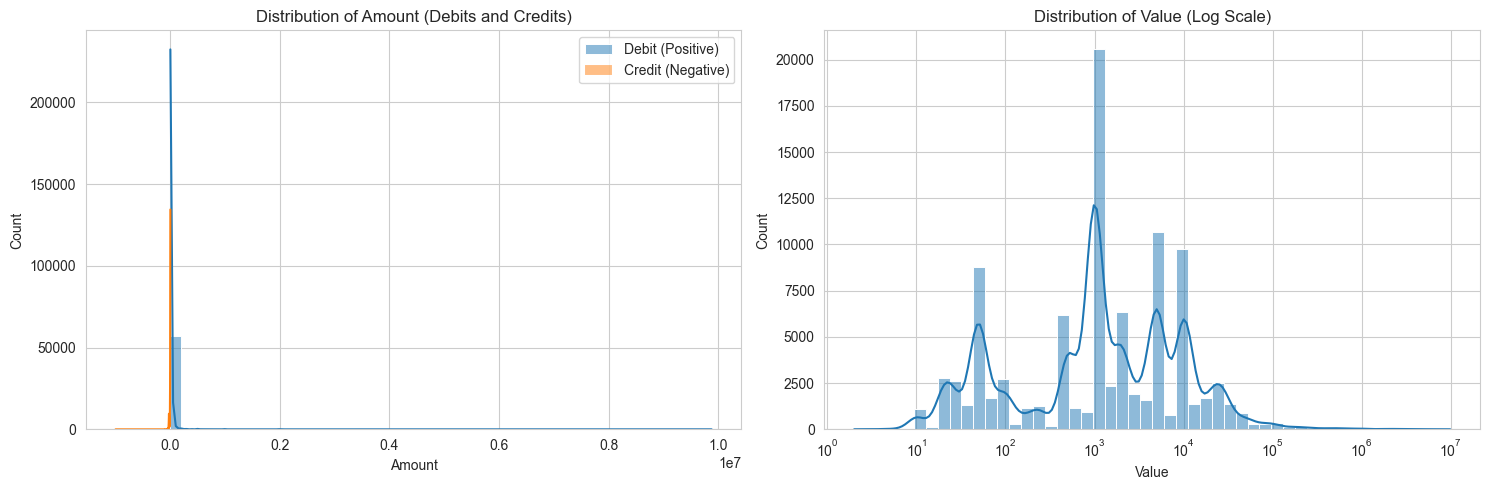


--- Categorical Feature Distributions (Bar Plots) ---


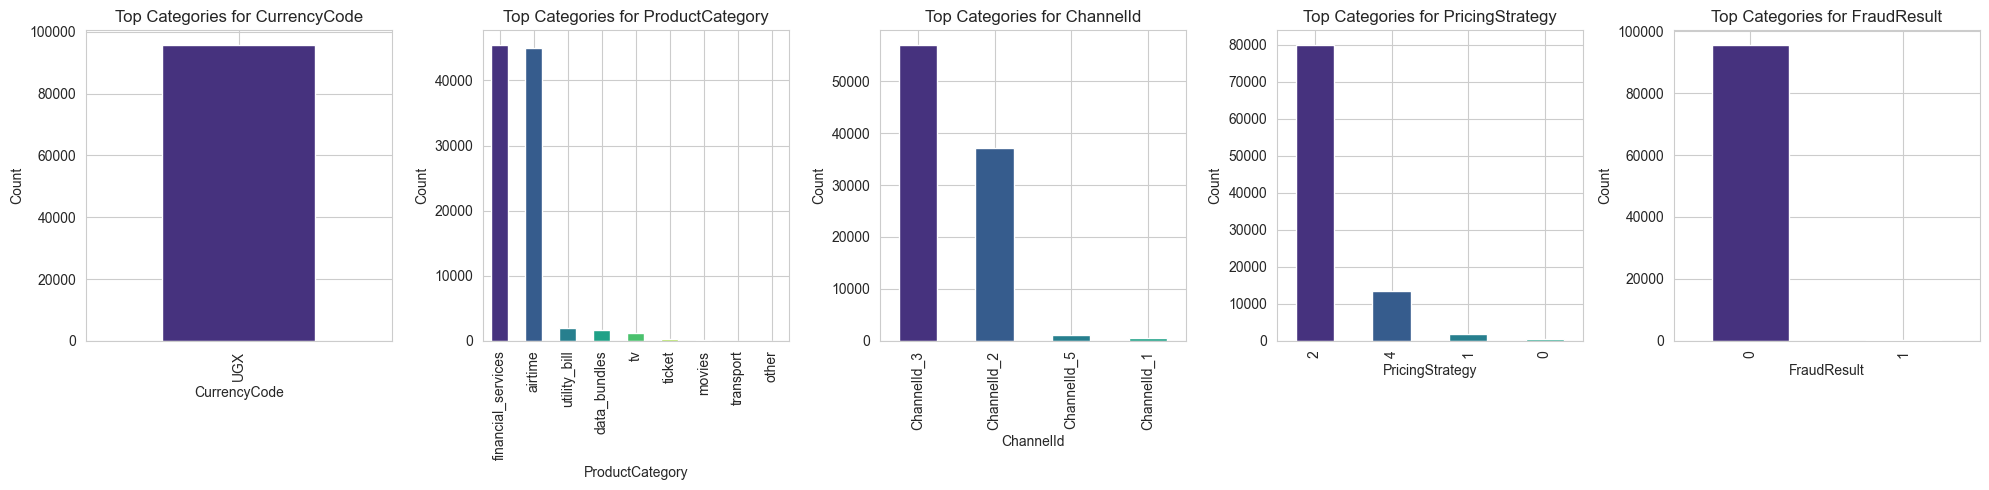


--- Correlation Matrix ---


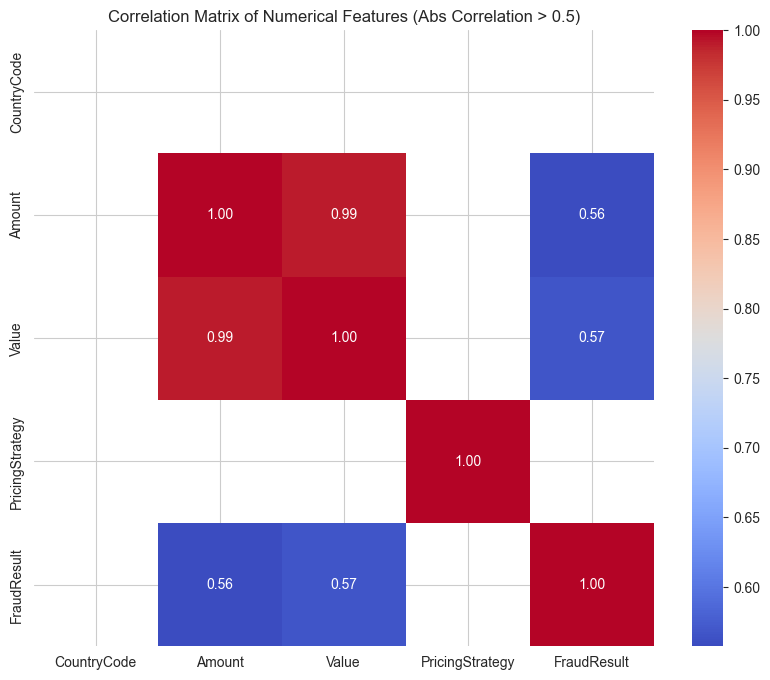


--- Missing Value Analysis ---
No missing values found in the dataset.

--- Outlier Detection (Box Plots) ---


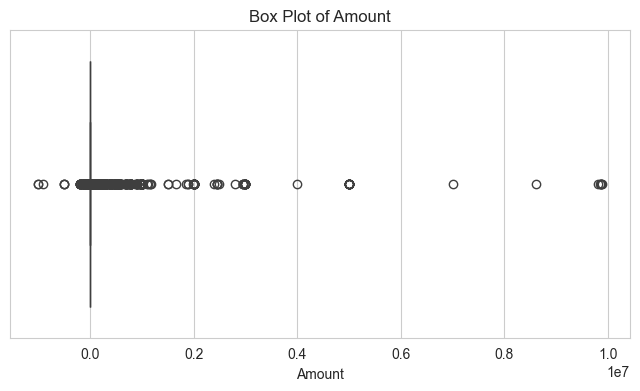

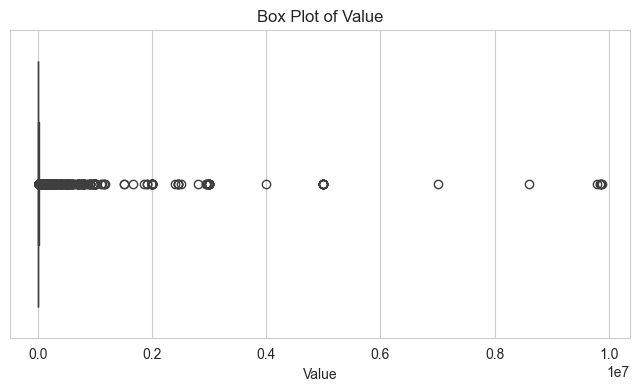

5.0

In [11]:
# --- 2. Summary Statistics (Instruction 2) ---
print("\n--- Summary Statistics for Numerical Features ---")
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
print(df[numerical_features].describe())

# --- 3. Distribution of Numerical Features (Instruction 3) ---
print("\n--- Numerical Feature Distributions (Histograms) ---")
# Focus on the monetary values
viz_numerical_features = ['Amount', 'Value'] 

plt.figure(figsize=(15, 5))
for i, col in enumerate(viz_numerical_features):
    plt.subplot(1, 2, i + 1)
    
    # Handle the fact that Amount has both positive and negative values (debits/credits)
    if col == 'Amount':
        # Visualize the distribution, potentially separating credits and debits
        sns.histplot(df[df[col] > 0][col], bins=50, kde=True, label='Debit (Positive)')
        sns.histplot(df[df[col] < 0][col], bins=50, kde=True, label='Credit (Negative)')
        plt.title(f'Distribution of {col} (Debits and Credits)')
        plt.legend()
    else: # 'Value' is the absolute value of amount [cite: 43]
        # Use log scale for highly skewed monetary data to better visualize the bulk of transactions
        sns.histplot(df[col], bins=50, kde=True, log_scale=True)
        plt.title(f'Distribution of {col} (Log Scale)')

plt.tight_layout()
plt.show() # 
# --- 4. Distribution of Categorical Features (Instruction 4) ---
print("\n--- Categorical Feature Distributions (Bar Plots) ---")
# Identify key categorical features based on the provided data fields [cite: 38-46]
key_categorical = ['CurrencyCode', 'ProductCategory', 'ChannelId', 'PricingStrategy', 'FraudResult']

plt.figure(figsize=(20, 5))
for i, col in enumerate(key_categorical):
    plt.subplot(1, len(key_categorical), i + 1)
    # Plot top 10 categories for clarity
    df[col].astype(str).value_counts().head(10).plot(kind='bar', color=sns.color_palette('viridis'))
    plt.title(f'Top Categories for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show() # ```

### Step 3: Correlation, Missing Values, and Outliers

#We check for data quality and feature relationships [cite: 142-149].

##Python Code for `notebooks/eda.ipynb` (Section 3: Quality Checks)**

# --- 5. Correlation Analysis (Instruction 5) ---
print("\n--- Correlation Matrix ---")
# Select only numerical columns for correlation calculation
corr_data = df.select_dtypes(include=np.number)
correlation_matrix = corr_data.corr()

plt.figure(figsize=(10, 8))
# Only show correlations greater than 0.5 or less than -0.5
mask = np.abs(correlation_matrix) < 0.5
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix of Numerical Features (Abs Correlation > 0.5)')
plt.show() # 
# --- 6. Identifying Missing Values (Instruction 6) ---
print("\n--- Missing Value Analysis ---")
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

if missing_data.empty:
    print("No missing values found in the dataset.")
else:
    print("Columns with Missing Values:")
    print(missing_data)
    # Visualize missingness
    plt.figure(figsize=(10, 5))
    missing_data.plot(kind='bar', color='darkred')
    plt.title('Count of Missing Values per Feature')
    plt.ylabel('Number of Missing Values')
    plt.show()

# --- 7. Outlier Detection (Instruction 7) ---
print("\n--- Outlier Detection (Box Plots) ---")
# Re-using the key numerical features for outlier visualization
for col in viz_numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show() # ```

### Step 4: Summarize Top Insights

#After running the above code and examining the output and visualizations, you must summarize your findings in the notebook[cite: 150].

##Add this summary section to the end of your `notebooks/eda.ipynb`:**
#markdown
### Summary of Top 3-5 Insights (Task 2 Deliverable)

#Based on the Exploratory Data Analysis, here are the key findings that will guide feature engineering and model development:

1.  #Monetary Variables are Highly Skewed and Outlier-Prone:** Both `Amount` and `Value` exhibit extreme right-skewness, confirmed by the summary statistics (mean much larger than median) and the box plots showing numerous outliers. These features **must be transformed** (e.g., log-transformed) before being used in clustering (Task 4) or models sensitive to feature scale (Task 3, 4).
2.  #Imbalance in Categorical Features (Fraud Result):** The `FraudResult` column, which is the only existing proxy for "bad" behavior[cite: 46], is heavily dominated by transactions labeled '0' (No Fraud). This confirms the need to **engineer a stronger, custom proxy variable** (Task 4) using RFM metrics, as the current fraud flag is too sparse to serve as the main credit risk target.
3.  #Missing Value Strategy:** (Based on the output of Step 6. **You will need to fill in specifics here.** For example: The `ProviderId` and `ProductCategory` columns have X% missing values. We will likely use **mode imputation** for these categorical columns in the `data_processing.py` script [cite: 169-170].)
4.  #Transaction Feature Correlation:** The `Amount` and `Value` columns are fundamentally linked (one is the absolute of the other)[cite: 42, 43]. The correlation heatmap will confirm this, suggesting that one of these is redundant for modeling once the absolute value is used or the data is transformed.
5.  #Preparation for RFM Calculation:** The data is structured at the transaction level, but the target (credit risk) must be at the **`CustomerId`** or **`AccountId`** level[cite: 35, 37]. This confirms that the primary task in feature engineering (Task 3) will be to **aggregate** all transaction features (like sum of `Value`, count of `TransactionId`) by the unique customer ID to prepare for the RFM calculation (Task 4) [cite: 155-158].